In [1]:
#1.读取数据 
import numpy as np # 导入 NumPy库
import pandas as pd # 导入 Pandas库
df = pd.read_csv("G:/儿童骨密度/DATA/Raw data/p_NMID_2.csv")  # 读取文件
df.head() 

,Gender,Age,Weight,Height,BMI,Total BMD,Lumbar spine BMD,TBLH BMD,TBLH BMD Z -score,Total fat percentage,...,LDL,TC,FBG,TyG index,HOMA-IR,HbA1c,Spexin,FGF23,"1,25(OH)2D",target
0,0,11,49.0,162.9,18.47,0.97,0.74,0.88,1.07,28.4,...,2.44,2.87,5.20,8.72,2.35,5.27,0.52,46.11,65.30,1
1,0,10,41.3,161.5,15.83,0.90,0.64,0.80,1.42,28.6,...,1.40,2.68,5.14,8.23,3.05,4.59,0.52,32.61,57.26,0
2,0,11,53.0,161.1,20.42,0.97,0.72,0.85,1.92,35.7,...,2.18,3.86,4.56,8.34,2.15,4.25,0.68,69.63,65.90,1
3,1,11,50.5,161.0,19.48,0.75,0.79,0.70,1.35,26.0,...,2.31,2.72,4.87,8.53,2.87,5.16,0.55,44.47,92.20,1
4,0,11,47.2,159.4,18.58,1.05,0.82,0.92,0.82,24.0,...,2.30,3.29,5.33,8.63,2.15,4.22,0.63,39.76,25.60,1


In [2]:
df.target.value_counts() # 输出分类值 , 及各个类别数目

0    167
1    165
Name: target, dtype: int64

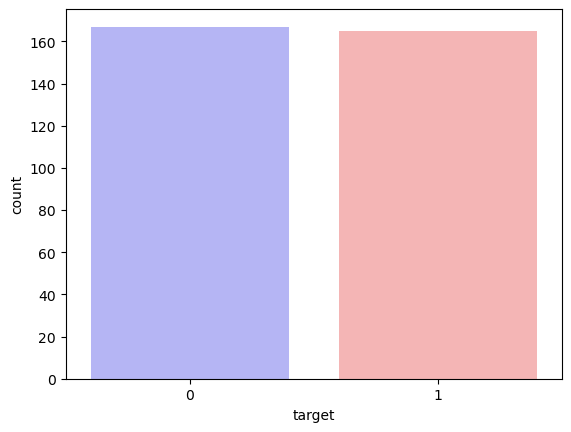

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns #导入seaborn画图工具箱
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [4]:
#df = df.drop(columns = ['ID'])#去除ID列
df.head()

,Gender,Age,Weight,Height,BMI,Total BMD,Lumbar spine BMD,TBLH BMD,TBLH BMD Z -score,Total fat percentage,...,LDL,TC,FBG,TyG index,HOMA-IR,HbA1c,Spexin,FGF23,"1,25(OH)2D",target
0,0,11,49.0,162.9,18.47,0.97,0.74,0.88,1.07,28.4,...,2.44,2.87,5.20,8.72,2.35,5.27,0.52,46.11,65.30,1
1,0,10,41.3,161.5,15.83,0.90,0.64,0.80,1.42,28.6,...,1.40,2.68,5.14,8.23,3.05,4.59,0.52,32.61,57.26,0
2,0,11,53.0,161.1,20.42,0.97,0.72,0.85,1.92,35.7,...,2.18,3.86,4.56,8.34,2.15,4.25,0.68,69.63,65.90,1
3,1,11,50.5,161.0,19.48,0.75,0.79,0.70,1.35,26.0,...,2.31,2.72,4.87,8.53,2.87,5.16,0.55,44.47,92.20,1
4,0,11,47.2,159.4,18.58,1.05,0.82,0.92,0.82,24.0,...,2.30,3.29,5.33,8.63,2.15,4.22,0.63,39.76,25.60,1


In [5]:
#2.构建特征集和标签集
X = df.drop(['target'], axis = 1) # 构建特征集
y = df.target.values # 构建标签集
y = y.reshape(-1, 1) # -1是相对索引 , 等价于 len(y)
print("张量 X的形状 :", X.shape)
print("张量 y的形状 :", y.shape)

张量 X的形状 : (332, 22)
张量 y的形状 : (332, 1)


In [6]:
#3.拆分数据集
#按照 80%/20% 的比例准备训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=2000)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler() 
X_train = scaler.ﬁt_transform(X_train) 
X_test = scaler.transform(X_test) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.6913760	total: 143ms	remaining: 14.1s
1:	learn: 0.6899265	total: 144ms	remaining: 7.07s
2:	learn: 0.6884088	total: 145ms	remaining: 4.7s
3:	learn: 0.6866859	total: 146ms	remaining: 3.51s
4:	learn: 0.6850113	total: 147ms	remaining: 2.8s
5:	learn: 0.6831958	total: 149ms	remaining: 2.33s
6:	learn: 0.6821138	total: 149ms	remaining: 1.99s
7:	learn: 0.6808283	total: 150ms	remaining: 1.73s
8:	learn: 0.6793113	total: 151ms	remaining: 1.53s
9:	learn: 0.6778840	total: 152ms	remaining: 1.37s
10:	learn: 0.6767979	total: 153ms	remaining: 1.24s
11:	learn: 0.6755072	total: 154ms	remaining: 1.13s
12:	learn: 0.6742374	total: 155ms	remaining: 1.04s
13:	learn: 0.6730571	total: 156ms	remaining: 960ms
14:	learn: 0.6714834	total: 157ms	remaining: 891ms
15:	learn: 0.6698166	total: 158ms	remaining: 831ms
16:	learn: 0.6688856	total: 159ms	remaining: 778ms
17:	learn: 0.6658740	total: 161ms	remaining: 732ms
18:	learn: 0.6641233	total: 162m

57:	learn: 0.6032279	total: 57.5ms	remaining: 41.6ms
58:	learn: 0.6014740	total: 58.7ms	remaining: 40.8ms
59:	learn: 0.5998025	total: 59.7ms	remaining: 39.8ms
60:	learn: 0.5978609	total: 60.9ms	remaining: 38.9ms
61:	learn: 0.5956106	total: 61.8ms	remaining: 37.9ms
62:	learn: 0.5945650	total: 62.8ms	remaining: 36.9ms
63:	learn: 0.5932122	total: 63.8ms	remaining: 35.9ms
64:	learn: 0.5920210	total: 64.9ms	remaining: 34.9ms
65:	learn: 0.5907806	total: 66.2ms	remaining: 34.1ms
66:	learn: 0.5887371	total: 67.2ms	remaining: 33.1ms
67:	learn: 0.5874562	total: 68.3ms	remaining: 32.2ms
68:	learn: 0.5861093	total: 69.3ms	remaining: 31.1ms
69:	learn: 0.5850949	total: 70.4ms	remaining: 30.1ms
70:	learn: 0.5842051	total: 71.4ms	remaining: 29.2ms
71:	learn: 0.5826358	total: 72.4ms	remaining: 28.2ms
72:	learn: 0.5814448	total: 73.4ms	remaining: 27.2ms
73:	learn: 0.5806448	total: 74.4ms	remaining: 26.1ms
74:	learn: 0.5790352	total: 75.3ms	remaining: 25.1ms
75:	learn: 0.5775310	total: 76.5ms	remaining: 

0:	learn: 0.6915240	total: 1.53ms	remaining: 152ms
1:	learn: 0.6892965	total: 2.81ms	remaining: 138ms
2:	learn: 0.6876325	total: 3.94ms	remaining: 127ms
3:	learn: 0.6852422	total: 5.29ms	remaining: 127ms
4:	learn: 0.6832807	total: 6.54ms	remaining: 124ms
5:	learn: 0.6812160	total: 7.81ms	remaining: 122ms
6:	learn: 0.6799627	total: 9ms	remaining: 120ms
7:	learn: 0.6779050	total: 10.1ms	remaining: 116ms
8:	learn: 0.6757844	total: 11.1ms	remaining: 113ms
9:	learn: 0.6744212	total: 12.3ms	remaining: 111ms
10:	learn: 0.6732535	total: 13.4ms	remaining: 109ms
11:	learn: 0.6714138	total: 14.7ms	remaining: 108ms
12:	learn: 0.6690849	total: 16ms	remaining: 107ms
13:	learn: 0.6672373	total: 17.2ms	remaining: 106ms
14:	learn: 0.6656986	total: 18.4ms	remaining: 104ms
15:	learn: 0.6639612	total: 19.4ms	remaining: 102ms
16:	learn: 0.6627650	total: 20.5ms	remaining: 100ms
17:	learn: 0.6598877	total: 21.6ms	remaining: 98.3ms
18:	learn: 0.6581548	total: 22.7ms	remaining: 96.8ms
19:	learn: 0.6563685	tota

<Axes: title={'center': 'CatBoost(Best Score)Confusion Matrix'}>

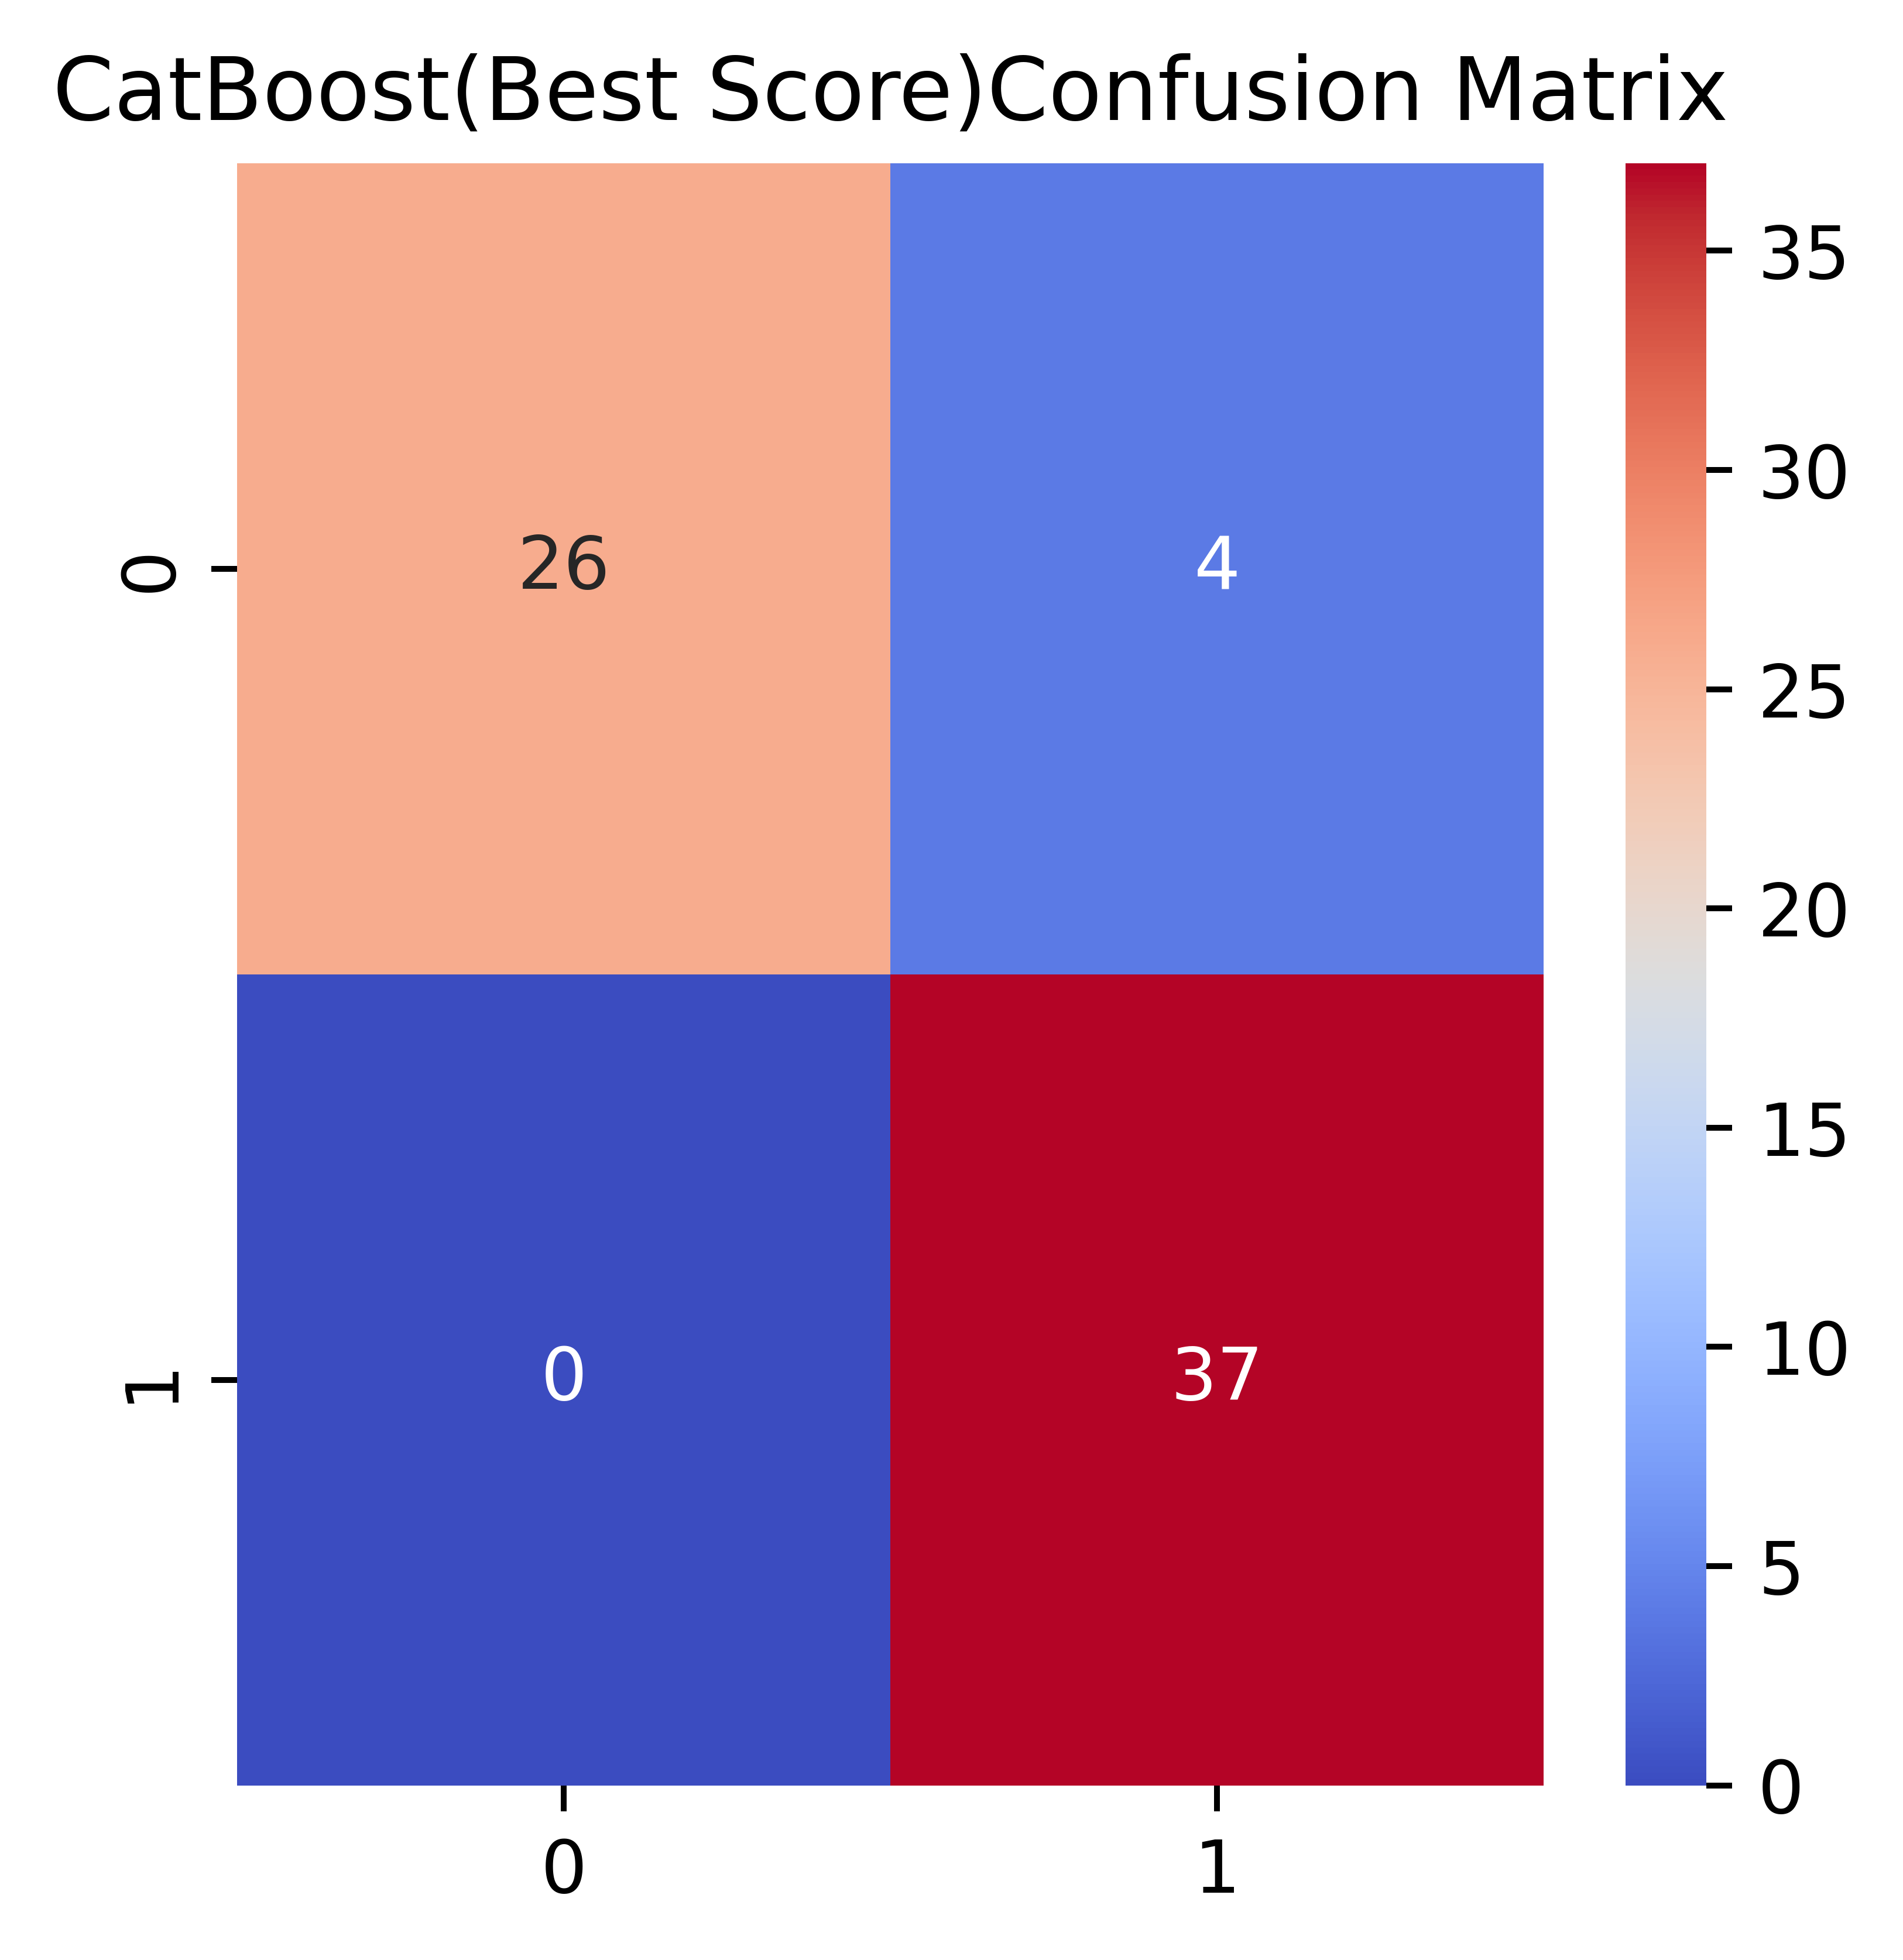

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import (f1_score, precision_score, recall_score, confusion_matrix, classification_report)

# 初始化 CatBoostClassifier
model = CatBoostClassifier(loss_function='Logloss', logging_level='Verbose', iterations=100)

# 定义超参数网格
param_grid = {
    'depth': [4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.5],
    'iterations': [50, 100, 200]
}

# 使用 GridSearchCV 进行超参数搜索
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print("最佳参数:", grid_search.best_params_)
print("最佳得分:", grid_search.best_score_)

# 使用最佳参数训练 CatBoost 模型
best_model = grid_search.best_estimator_

# 进行5折交叉验证
cross_val_results = cross_validate(best_model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

# 输出交叉验证结果
print("交叉验证训练集得分:", cross_val_results['train_score'])
print("交叉验证验证集得分:", cross_val_results['test_score'])

# 使用最佳模型进行预测
Cat_y_pred = best_model.predict(X_test)  # 预测结果
Cat_y_prob = best_model.predict_proba(X_test)[:, 1]  # 预测概率

cm_Catgs = confusion_matrix(y_test, Cat_y_pred)
Cat_acc = best_model.score(X_test, y_test) * 100
cm_dot_four = confusion_matrix(Cat_y_prob >= 0.52, Cat_y_pred)
plt.figure(figsize=(4, 4), dpi=900)#设置图片大小，像素
print('CatBoost混淆矩阵:\n', cm_dot_four)
plt.title("CatBoost(Best Score)Confusion Matrix")#KNN（最优参数）混淆矩阵
sns.heatmap(cm_dot_four, annot=True, cmap="coolwarm", fmt="d", cbar="TRUE")

In [9]:
import numpy as np
from scipy.stats import sem
from sklearn.metrics import roc_auc_score

y_pred = Cat_y_prob
y_true = y_test

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

Original ROC area: 0.727
Bootstrap #1 ROC area: 0.757
Bootstrap #2 ROC area: 0.703
Bootstrap #3 ROC area: 0.668
Bootstrap #4 ROC area: 0.668
Bootstrap #5 ROC area: 0.753
Bootstrap #6 ROC area: 0.609
Bootstrap #7 ROC area: 0.787
Bootstrap #8 ROC area: 0.673
Bootstrap #9 ROC area: 0.786
Bootstrap #10 ROC area: 0.842
Bootstrap #11 ROC area: 0.768
Bootstrap #12 ROC area: 0.732
Bootstrap #13 ROC area: 0.746
Bootstrap #14 ROC area: 0.694
Bootstrap #15 ROC area: 0.736
Bootstrap #16 ROC area: 0.679
Bootstrap #17 ROC area: 0.851
Bootstrap #18 ROC area: 0.747
Bootstrap #19 ROC area: 0.586
Bootstrap #20 ROC area: 0.748
Bootstrap #21 ROC area: 0.663
Bootstrap #22 ROC area: 0.659
Bootstrap #23 ROC area: 0.617
Bootstrap #24 ROC area: 0.722
Bootstrap #25 ROC area: 0.771
Bootstrap #26 ROC area: 0.604
Bootstrap #27 ROC area: 0.705
Bootstrap #28 ROC area: 0.742
Bootstrap #29 ROC area: 0.756
Bootstrap #30 ROC area: 0.685
Bootstrap #31 ROC area: 0.758
Bootstrap #32 ROC area: 0.689
Bootstrap #33 ROC area: 

Bootstrap #381 ROC area: 0.757
Bootstrap #382 ROC area: 0.836
Bootstrap #383 ROC area: 0.804
Bootstrap #384 ROC area: 0.782
Bootstrap #385 ROC area: 0.639
Bootstrap #386 ROC area: 0.656
Bootstrap #387 ROC area: 0.692
Bootstrap #388 ROC area: 0.623
Bootstrap #389 ROC area: 0.721
Bootstrap #390 ROC area: 0.791
Bootstrap #391 ROC area: 0.704
Bootstrap #392 ROC area: 0.819
Bootstrap #393 ROC area: 0.726
Bootstrap #394 ROC area: 0.755
Bootstrap #395 ROC area: 0.641
Bootstrap #396 ROC area: 0.608
Bootstrap #397 ROC area: 0.689
Bootstrap #398 ROC area: 0.711
Bootstrap #399 ROC area: 0.726
Bootstrap #400 ROC area: 0.624
Bootstrap #401 ROC area: 0.724
Bootstrap #402 ROC area: 0.765
Bootstrap #403 ROC area: 0.800
Bootstrap #404 ROC area: 0.703
Bootstrap #405 ROC area: 0.828
Bootstrap #406 ROC area: 0.730
Bootstrap #407 ROC area: 0.766
Bootstrap #408 ROC area: 0.737
Bootstrap #409 ROC area: 0.695
Bootstrap #410 ROC area: 0.691
Bootstrap #411 ROC area: 0.840
Bootstrap #412 ROC area: 0.718
Bootstra

Bootstrap #769 ROC area: 0.711
Bootstrap #770 ROC area: 0.662
Bootstrap #771 ROC area: 0.732
Bootstrap #772 ROC area: 0.630
Bootstrap #773 ROC area: 0.723
Bootstrap #774 ROC area: 0.856
Bootstrap #775 ROC area: 0.822
Bootstrap #776 ROC area: 0.723
Bootstrap #777 ROC area: 0.726
Bootstrap #778 ROC area: 0.656
Bootstrap #779 ROC area: 0.813
Bootstrap #780 ROC area: 0.754
Bootstrap #781 ROC area: 0.753
Bootstrap #782 ROC area: 0.701
Bootstrap #783 ROC area: 0.686
Bootstrap #784 ROC area: 0.671
Bootstrap #785 ROC area: 0.657
Bootstrap #786 ROC area: 0.652
Bootstrap #787 ROC area: 0.713
Bootstrap #788 ROC area: 0.801
Bootstrap #789 ROC area: 0.755
Bootstrap #790 ROC area: 0.752
Bootstrap #791 ROC area: 0.680
Bootstrap #792 ROC area: 0.590
Bootstrap #793 ROC area: 0.748
Bootstrap #794 ROC area: 0.748
Bootstrap #795 ROC area: 0.725
Bootstrap #796 ROC area: 0.724
Bootstrap #797 ROC area: 0.705
Bootstrap #798 ROC area: 0.764
Bootstrap #799 ROC area: 0.756
Bootstrap #800 ROC area: 0.783
Bootstra

In [10]:
#计算AUC95% CI
sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("AUC 95%CI:[{:0.3f}-{:0.3}]".format(
    confidence_lower, confidence_upper))

AUC 95%CI:[0.619-0.827]


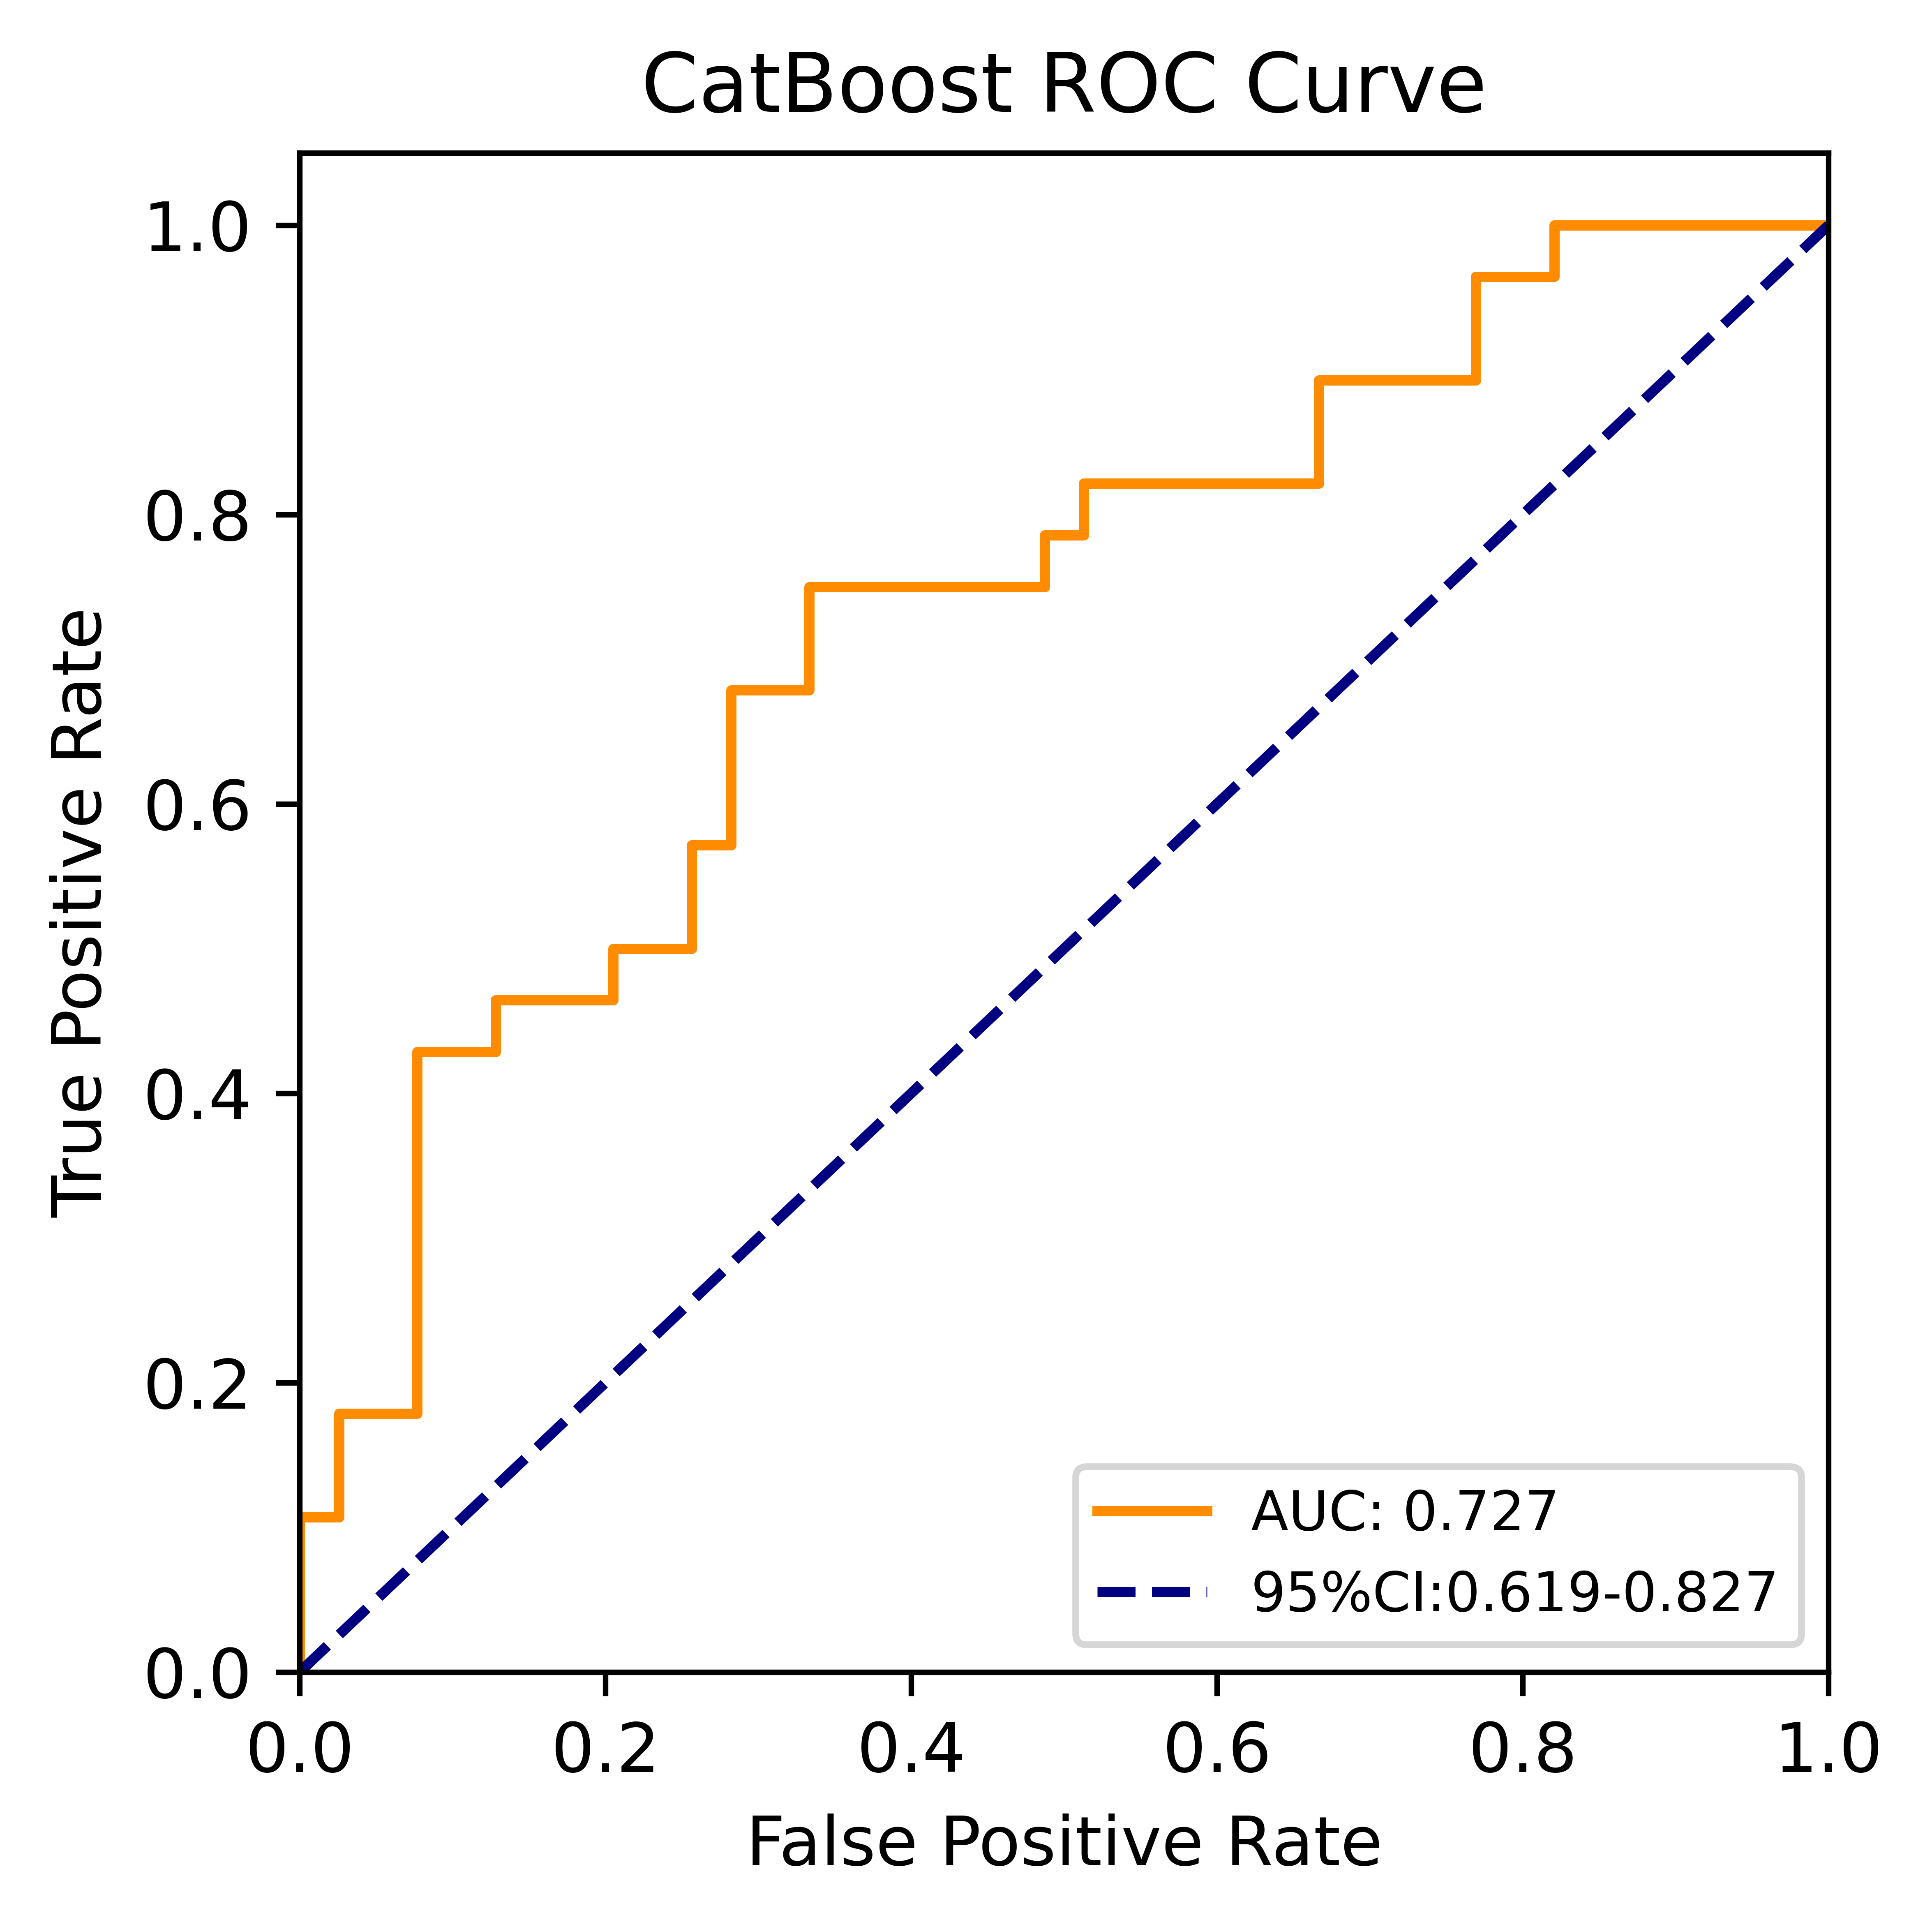

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
fpr, tpr, threshold = roc_curve(y_test,Cat_y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(4, 4), dpi=1200)
plt.plot(fpr, tpr, color='darkorange', lw=1.5)
plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC Curve')
plt.legend(['AUC: %0.3f' % roc_auc, "95%CI:{:0.3f}-{:0.3}".format(
    confidence_lower, confidence_upper)],loc="lower right", prop={'size': 8},markerfirst=True)
plt.show()
 

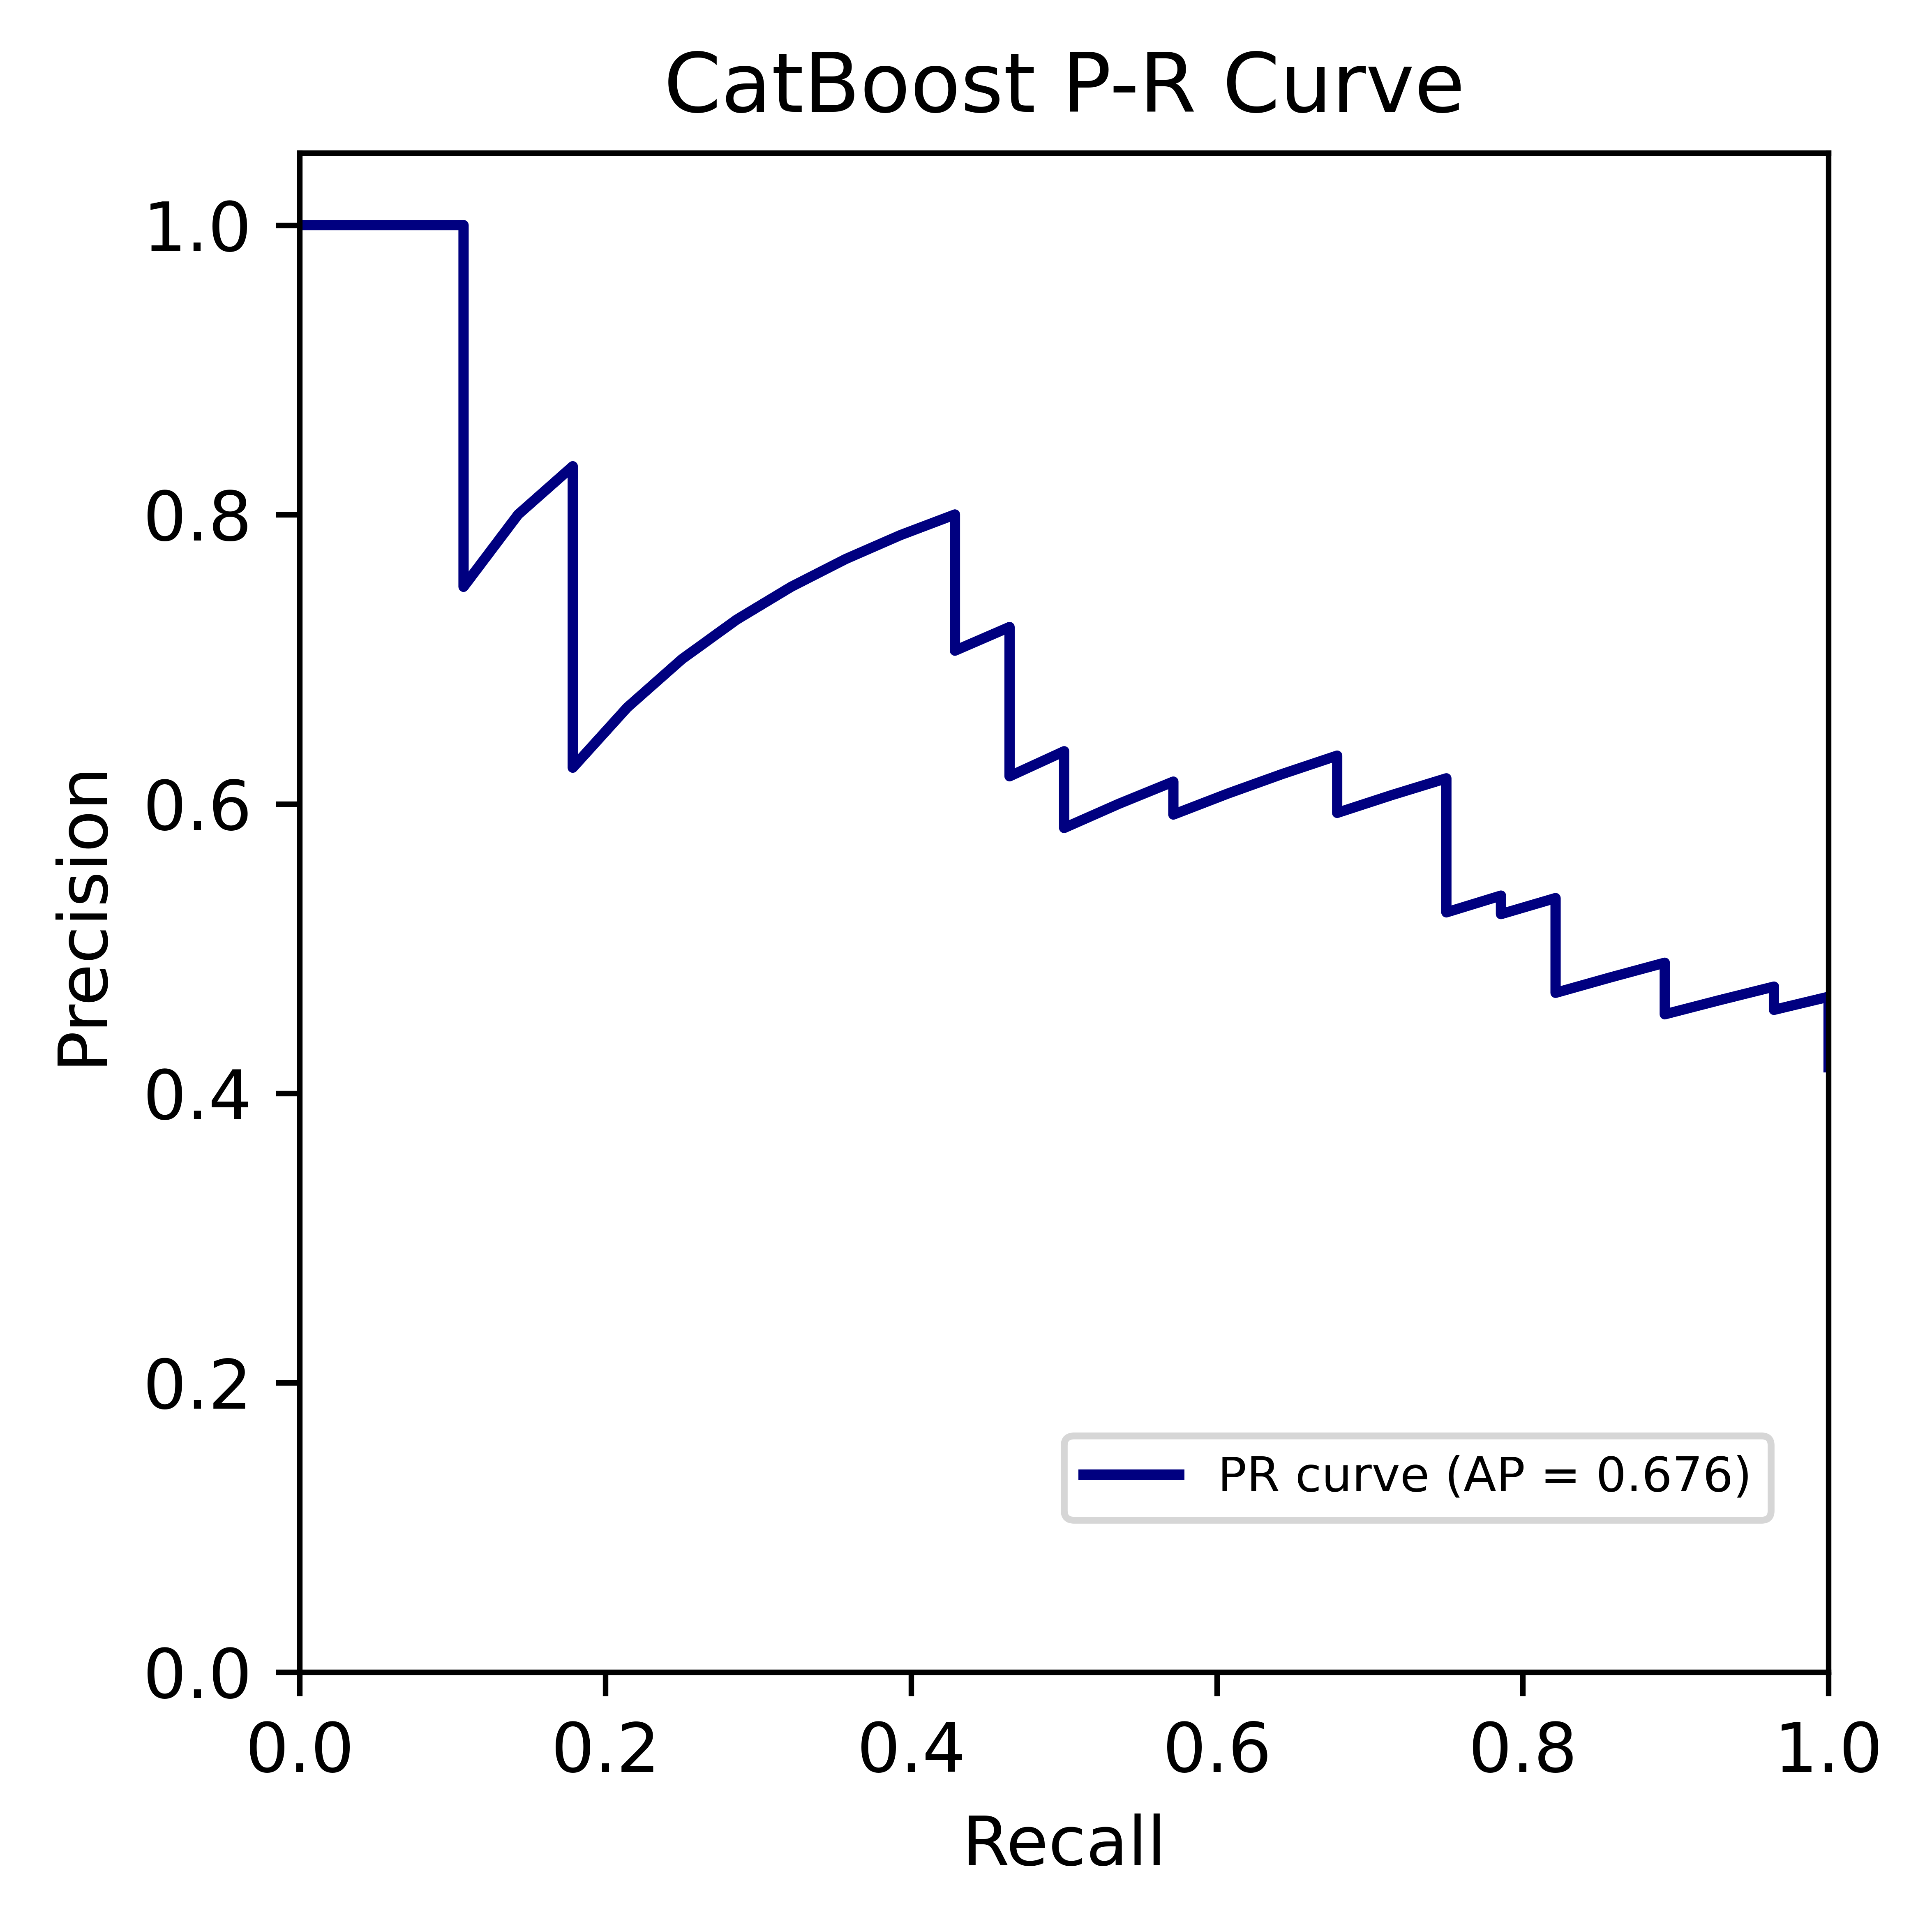

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve, average_precision_score

# y_true为样本实际的类别1为正例0为反例，y_scores为阈值

precision, recall, thresholds = precision_recall_curve(y_test,Cat_y_prob)
AP = average_precision_score(y_test,Cat_y_prob, average='macro', pos_label=1, sample_weight=None)
plt.figure(figsize=(4, 4), dpi=1200)
plt.plot(recall, precision, lw=1.5, color='navy', label='PR curve (AP = %0.3f)' % AP)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('CatBoost P-R Curve')
plt.legend(loc=(0.5,0.1), prop={'size': 7})#标签左下角坐标，字体7号
plt.show()

#### 计算AP值，PR曲线下面积，PR曲线下面的面积越大，模型的性能越好
from sklearn.metrics import precision_recall_curve, average_precision_score
AP = average_precision_score(y_test,Cat_y_prob, average='macro', pos_label=1, sample_weight=None)
print('AP:', AP)

In [14]:
##brier评分
from sklearn.metrics import brier_score_loss
print('Brier评分:', brier_score_loss(y_test,Cat_y_prob))

Brier评分: 0.23126207084370942


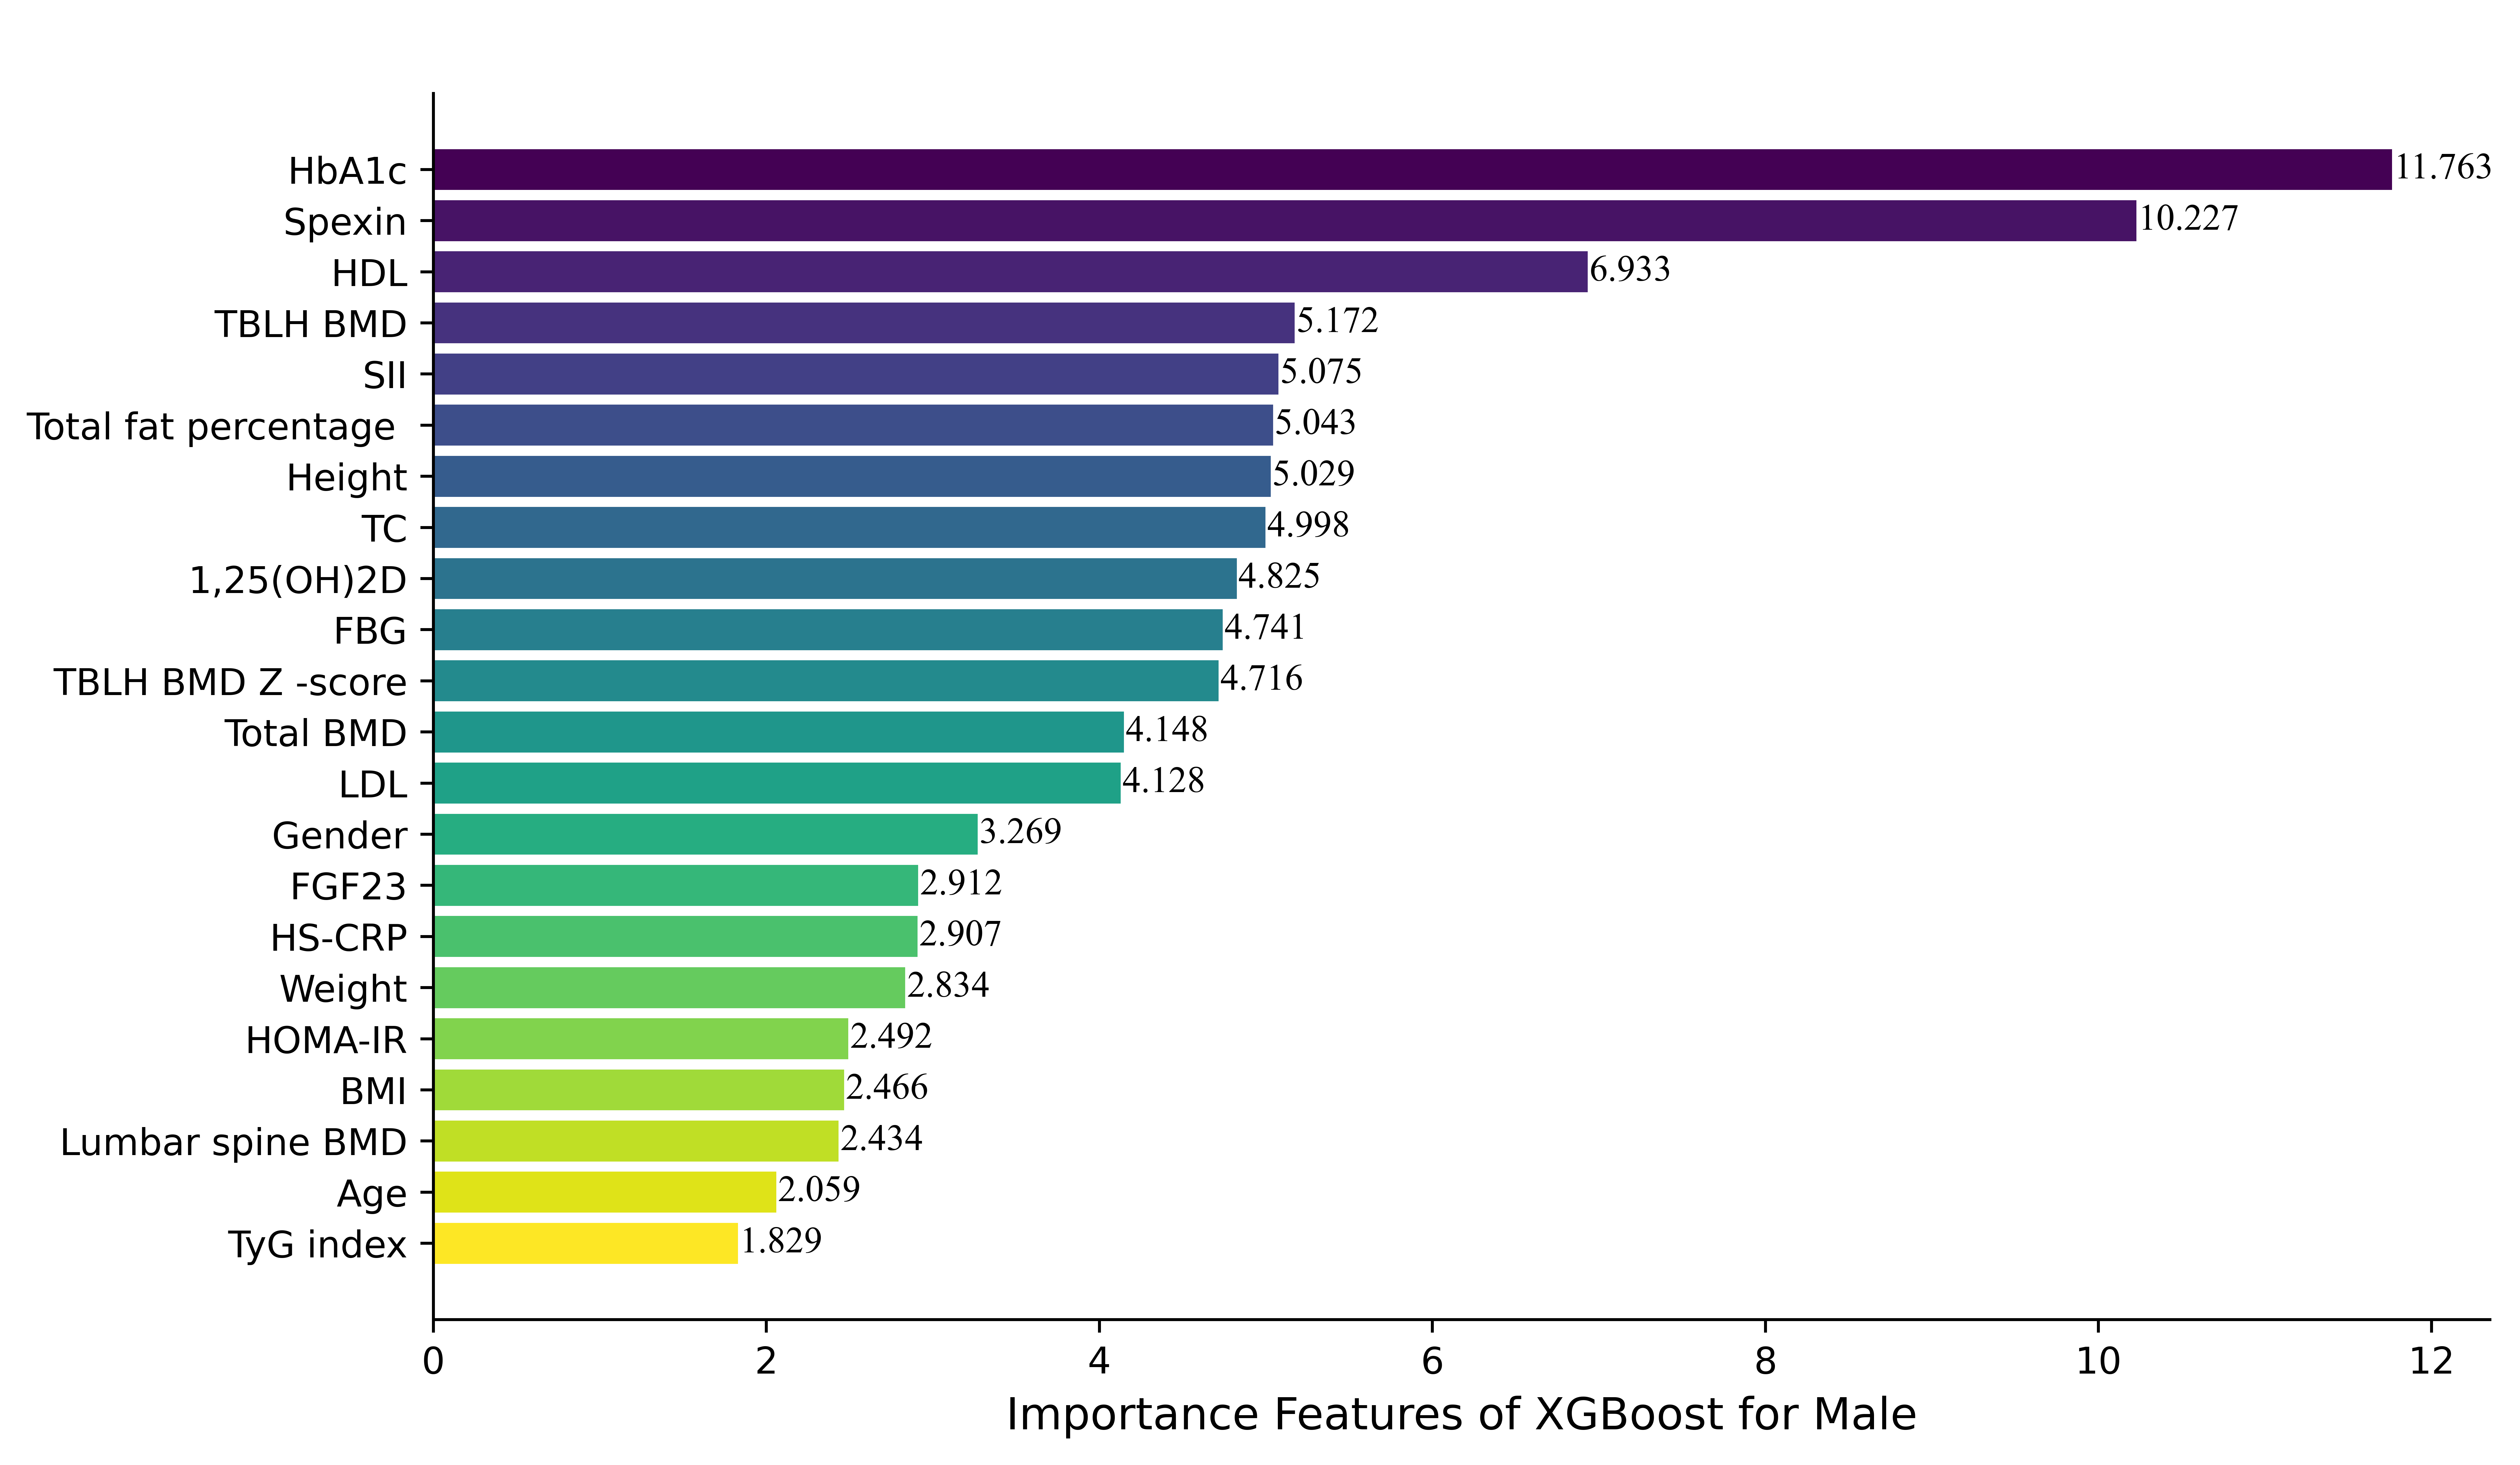

In [15]:
feature_importances = best_model.feature_importances_
# 创建特征名列表
feature_names = list(X.columns)
# 创建一个DataFrame，包含特征名和其重要性得分
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
# 对特征重要性得分进行排序
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)
 
# 颜色映射
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_names)))
 
# 可视化特征重要性
fig, ax = plt.subplots(figsize=(10, 6), dpi=900)
ax.barh(feature_importances_df['feature'], feature_importances_df['importance'], color=colors)
ax.invert_yaxis()  # 翻转y轴，使得最大的特征在最上面
ax.set_xlabel('Importance Features of XGBoost for Male', fontsize=12)  # 图形的x标签
ax.set_title(' ',fontsize=16)
for i, v in enumerate(feature_importances_df['importance']):
    ax.text(v + 0.01, i, str(round(v, 3)), va='center', fontname='Times New Roman', fontsize=10)
 
# # 设置图形样式
# plt.style.use('default')
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框
# ax.spines['left'].set_linewidth(0.5)#左边框粗细
# ax.spines['bottom'].set_linewidth(0.5)#下边框粗细
# ax.tick_params(width=0.5)
# ax.set_facecolor('white')#背景色为白色
# ax.grid(False)#关闭内部网格线

In [16]:
import shap
explainer = shap.KernelExplainer(best_model.predict,X_train)

Using 265 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [17]:
shap_values = explainer.shap_values(X_test,nsamples=200)

  0%|          | 0/67 [00:00<?, ?it/s]

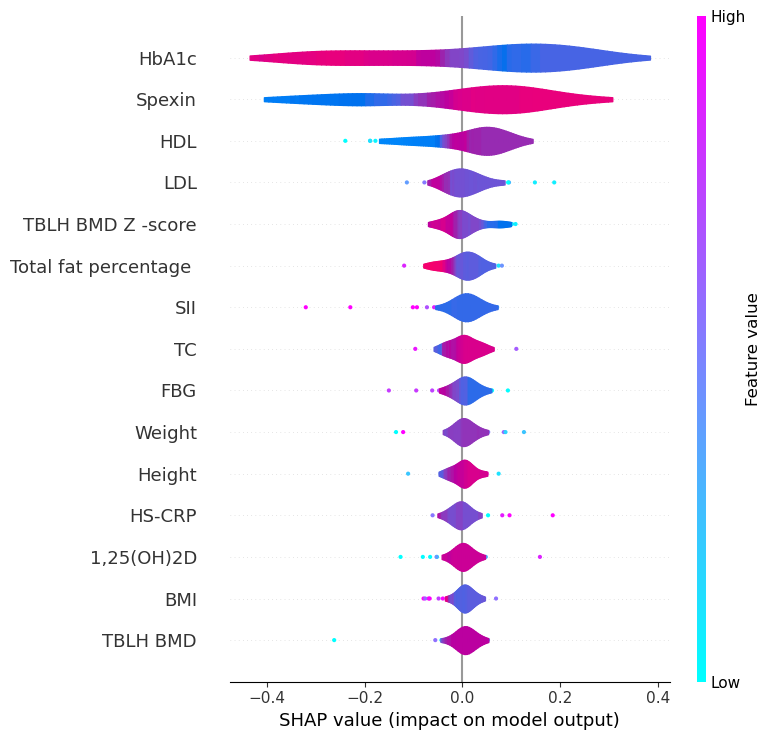

In [18]:
import matplotlib.pyplot as plt
shap.summary_plot(shap_values,X_test,feature_names,plot_type='violin',cmap='cool' , max_display=15,show=False)
plt.savefig('./1.png', bbox_inches='tight', dpi=900)#dot,violin

In [19]:
shap.initjs() 
shap.plots.force(explainer.expected_value, shap_values[:300])

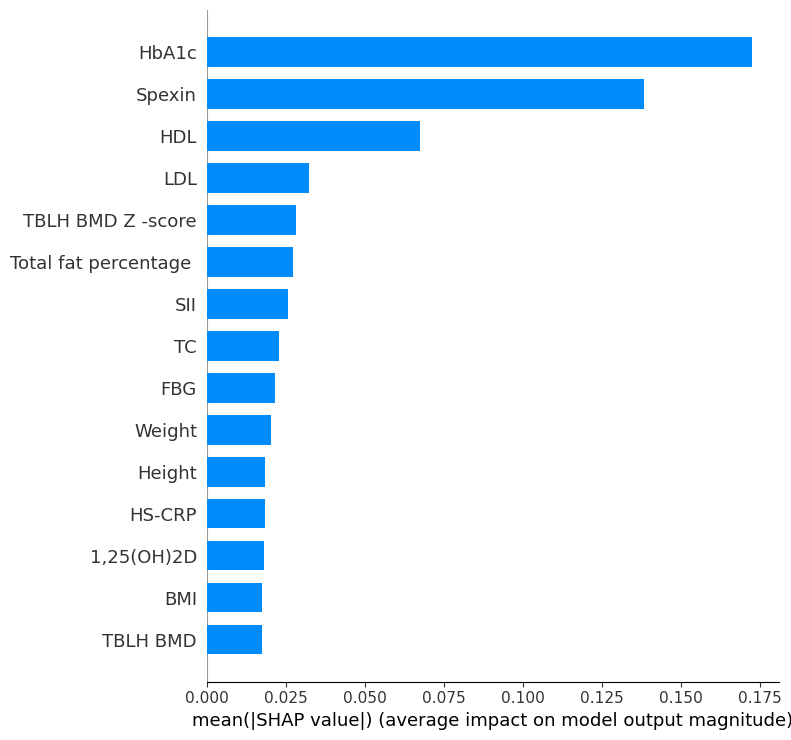

In [20]:
shap.summary_plot(shap_values, X_test,feature_names, plot_type="bar",max_display=15,show=False)
plt.savefig('./2.png', bbox_inches='tight', dpi=900)

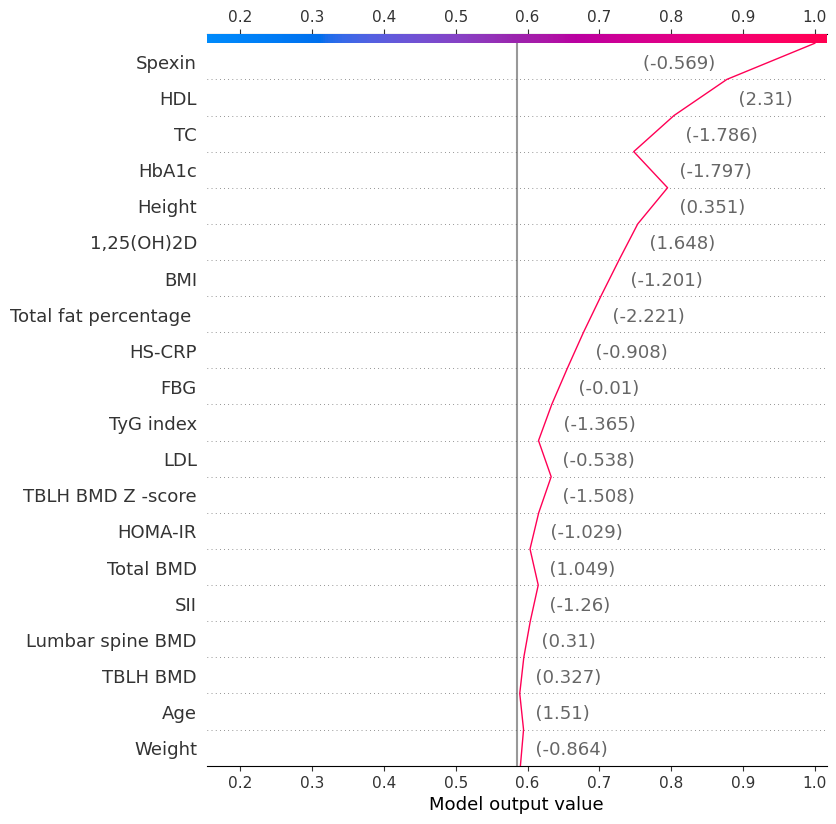

In [21]:
shap.decision_plot(explainer.expected_value, shap_values[1],X_test, feature_names,show=False)
plt.savefig('./3.png', bbox_inches='tight', dpi=900)

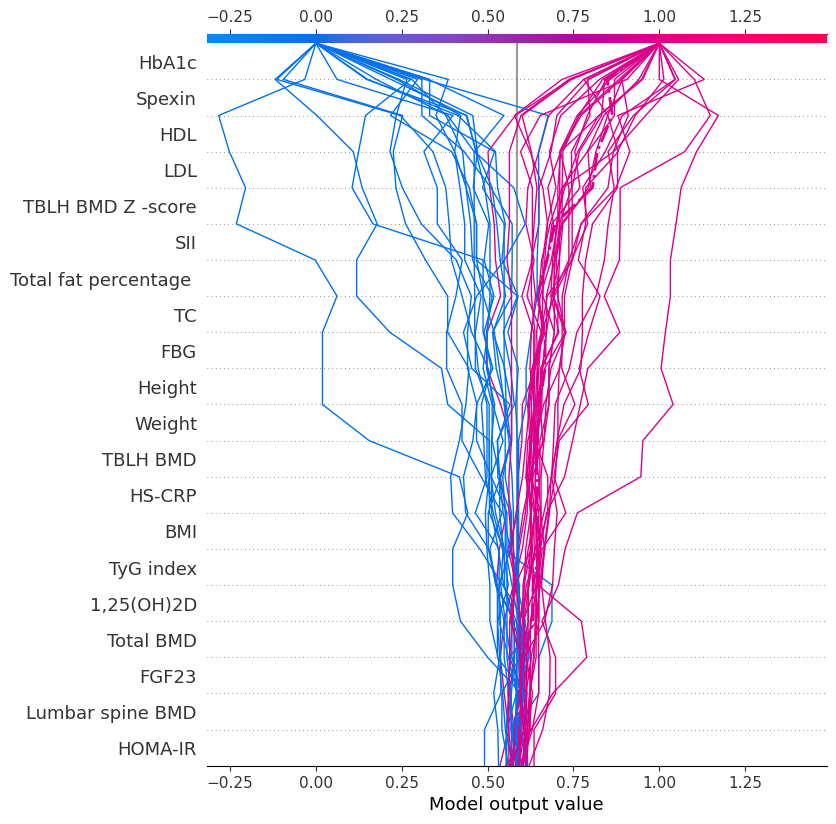

In [22]:
shap.decision_plot(explainer.expected_value, shap_values[:50],X_test, feature_names,highlight=0,show= False)
plt.savefig('./4.png', bbox_inches='tight', dpi=900)

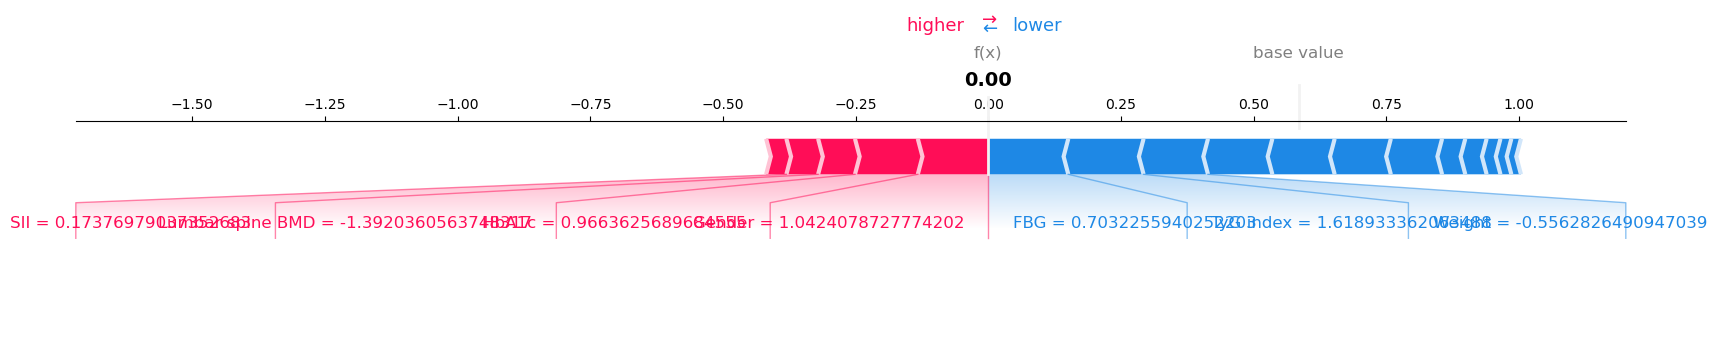

<Figure size 640x480 with 0 Axes>

In [23]:
import shap
import matplotlib.pyplot as plt
shap.initjs()
feature_names = list(X.columns)
shap.force_plot(explainer.expected_value, shap_values[6,:] ,X_test[12,:],feature_names, matplotlib=True)#更改shap_values[13,:]
plt.savefig('./force_plot2.png', bbox_inches='tight', dpi=900)

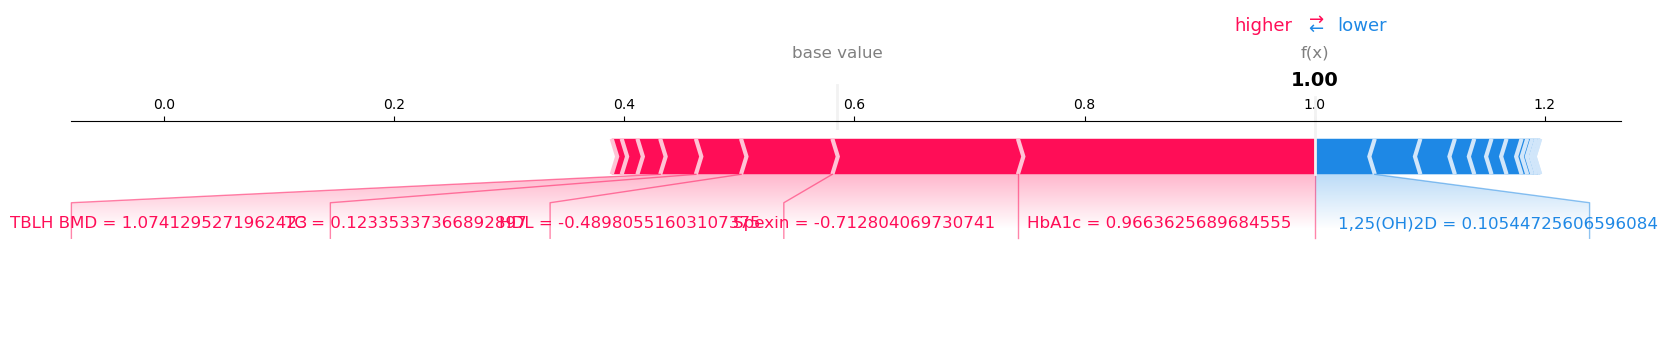

<Figure size 640x480 with 0 Axes>

In [24]:
import shap
import matplotlib.pyplot as plt
shap.initjs()
feature_names = list(X.columns)
shap.force_plot(explainer.expected_value, shap_values[4,:] ,X_test[12,:],feature_names, matplotlib=True)#更改shap_values[13,:]
plt.savefig('./force_plot2.png', bbox_inches='tight', dpi=900)